In [2]:
import pandas as pd
import pandas.io.data as web
import numpy as np
import datetime
import matplotlib.pyplot as plt
%matplotlib inline
pd.set_option('display.notebook_repr_html', False)
pd.set_option('display.max_columns', 6)
pd.set_option('display.max_rows', 10)
pd.set_option('display.width', 78)
pd.set_option('precision', 3)

In [3]:
# get data from yahoo finance
def get_data(symbol, start, end):
    return web.DataReader(symbol, 'yahoo', start, end)
symbol = '002022.SZ'
start = '20050101'
end = '20131231'
data = get_data(symbol, start, end)

In [4]:
def tr(data):
    ''' generate true range TR tech signal'''
    name = 'prev_value'
    data[name] = data.shift(1).Close
    hh = data[['High', name]].max(axis=1)
    ll = data[['Low', name]].min(axis=1)
    del data[name]
    return(hh -ll)

tr(data)
data['TR'] = tr(data)

In [5]:
def ma(data, timespan):
    return pd.rolling_mean(data['Close'], timespan)
short_span = 30
long_span = 100
data['sma'] = ma(data, short_span)
data['lma'] = ma(data, long_span)

In [6]:
data['atr'] = pd.rolling_mean(data['TR'], short_span)
data.tail

<bound method DataFrame.tail of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-01-03  15.63  15.80  15.55  ...     NaN    NaN   NaN
2005-01-04  15.46  15.70  15.31  ...     NaN    NaN   NaN
2005-01-05  15.50  15.88  15.42  ...     NaN    NaN   NaN
2005-01-06  15.65  15.85  15.55  ...     NaN    NaN   NaN
2005-01-07  15.79  15.86  15.50  ...     NaN    NaN   NaN
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.29  16.03  0.42
2013-12-26  16.82  16.82  16.82  ...   16.34  16.03  0.40
2013-12-27  16.82  16.82  16.82  ...   16.38  16.03  0.39
2013-12-30  16.82  16.82  16.82  ...   16.42  16.01  0.37
2013-12-31  16.82  16.82  16.82  ...   16.47  16.01  0.36

[2306 rows x 10 columns]>

In [7]:
data.drop(data[0:long_span].index, inplace = True)
data.head

<bound method DataFrame.head of              Open   High    Low  ...     sma    lma   atr
Date                             ...                     
2005-05-23  10.70  10.70  10.26  ...   11.67  14.08  0.51
2005-05-24  10.24  10.76  10.21  ...   11.62  14.04  0.51
2005-05-25  10.65  10.71  10.50  ...   11.56  13.98  0.50
2005-05-26  10.56  10.73  10.35  ...   11.46  13.93  0.47
2005-05-27  10.30  10.52  10.20  ...   11.35  13.88  0.46
...           ...    ...    ...  ...     ...    ...   ...
2013-12-25  16.82  16.82  16.82  ...   16.29  16.03  0.42
2013-12-26  16.82  16.82  16.82  ...   16.34  16.03  0.40
2013-12-27  16.82  16.82  16.82  ...   16.38  16.03  0.39
2013-12-30  16.82  16.82  16.82  ...   16.42  16.01  0.37
2013-12-31  16.82  16.82  16.82  ...   16.47  16.01  0.36

[2206 rows x 10 columns]>

In [8]:
def gen_sig(data):
    data['sig']= 0
    data.loc[(data.Close > data.sma) & (data.sma > data.lma), 'sig'] = 1

gen_sig(data)
data.tail(n=20)


             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2013-12-04  16.67  17.09  16.60 ...   16.09  0.48    0
2013-12-05  16.60  16.76  16.36 ...   16.10  0.49    0
2013-12-06  16.50  16.65  16.26 ...   16.09  0.46    0
2013-12-09  16.30  17.06  16.30 ...   16.09  0.47    0
2013-12-10  17.00  17.08  16.75 ...   16.08  0.45    0
...           ...    ...    ... ...     ...   ...  ...
2013-12-25  16.82  16.82  16.82 ...   16.03  0.42    1
2013-12-26  16.82  16.82  16.82 ...   16.03  0.40    1
2013-12-27  16.82  16.82  16.82 ...   16.03  0.39    1
2013-12-30  16.82  16.82  16.82 ...   16.01  0.37    1
2013-12-31  16.82  16.82  16.82 ...   16.01  0.36    1

[20 rows x 11 columns]

In [9]:
entry_days = data[data.sig > data.sig.shift()].index
i = data.index.get_loc(entry_days[0])
data[i-2 :i + 20]

             Open   High    Low ...     lma   atr  sig
Date                            ...                   
2005-08-10  13.96  14.00  13.61 ...   11.70  0.46    0
2005-08-11  13.91  14.09  13.71 ...   11.68  0.45    0
2005-08-12  14.02  14.49  13.75 ...   11.66  0.46    1
2005-08-15  14.15  15.29  14.10 ...   11.66  0.49    1
2005-08-16  15.28  15.28  14.62 ...   11.65  0.49    1
...           ...    ...    ... ...     ...   ...  ...
2005-09-02  14.48  15.12  14.48 ...   11.70  0.59    1
2005-09-05  15.04  15.19  14.78 ...   11.72  0.59    1
2005-09-06  14.95  15.00  14.49 ...   11.74  0.59    1
2005-09-07  14.47  15.00  14.38 ...   11.77  0.60    1
2005-09-08  15.10  15.10  14.70 ...   11.79  0.61    1

[22 rows x 11 columns]

In [10]:
exit_days = data[data.sig < data.sig.shift()].index
exit_days[1]

i = data.index.get_loc(exit_days[0])
data[i-2 :i + 20]

print(entry_days)
print(exit_days)

<class 'pandas.tseries.index.DatetimeIndex'>
[2005-08-12, ..., 2013-12-19]
Length: 52, Freq: None, Timezone: None
<class 'pandas.tseries.index.DatetimeIndex'>
[2005-10-28, ..., 2013-09-25]
Length: 51, Freq: None, Timezone: None


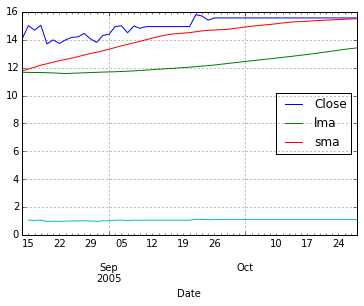

In [11]:
from datetime import timedelta 
def get_trans(data, index, entry_days, exit_days):
    if index >= len(exit_days): return None
    start_date = entry_days[index]
    end_date = exit_days[index]
    if start_date > end_date and index < len(exit_days)-1:
        end_date = exit_days[index + 1]
    elif start_date > end_date:
        end_date = data.index[-1]
    
    end_date = end_date - timedelta(days=1)
    return data[start_date : end_date ].copy()

#print(entry_days[0], exit_days[0])
#entry_days[0] > exit_days[0]
get_trans(data, 0, entry_days, exit_days)

get_trans(data, 1, entry_days, exit_days).tail()

trans_1 = get_trans(data, 0, entry_days, exit_days)
price_change = trans_1['Adj Close'].pct_change()
ret = ( price_change + 1).cumprod()
trans_1[['Close', 'lma', 'sma']].plot()
ret.plot()
#trans_1.tail()
# and ax2 is in the lower row

In [12]:
def get_first_date(dates):
    if len(dates) > 0 :
        return dates[0]
    else:
        return None
    
def get_not_none_date(date1, date2):
    if date1 is None:
        return date2
    else:
        return date1

def get_stopl_date(data, stop_at_pct):
    '''获取止损时间
    data 交易信号存在数据
    stop_at_pct 止损百分比
    '''
    data['cum_prod'] = (data['Close'].pct_change() + 1).cumprod()
    stops = data[data.cum_prod < stop_at_pct].index
    return get_not_none_date(get_first_date(stops), data.index[-1])
  
# test for get_stopl_date function
trans2 = get_trans(data, 1, entry_days, exit_days)
print(get_stopl_date(trans2, 0.97))
np.min(trans2.cum_prod)



2005-11-21 00:00:00


0.99642714796121712

In [13]:

def get_trailstop_date(data, trailstop):
    '''获取跟踪止损日期'''
    
    data['cum_max'] = data['Close'].cummax()
    stops = data[data['cum_max']-data['Close'] > trailstop].index
    return get_not_none_date(get_first_date(stops), data.index[-1])

trailstop =  trans2.iloc[0].atr
print(trailstop)
ts_at = get_trailstop_date(trans2, trailstop)
print(ts_at)
if not ts_at is None:
   print(trans2.loc[ts_at, 'cum_max'], trans2.loc[ts_at, 'Close'])

trans2['Close']

0.487332333333
2005-11-21 00:00:00
(14.000020000000001, 13.949999999999999)


Date
2005-11-18    14.00
2005-11-21    13.95
Name: Close, dtype: float64

In [18]:
stoplevel = 0.95
ts_factor = 3

def plot_tran(data, stop_at, trails_at):
    data[['Close', 'lma', 'sma']].plot()
    pd.Series(data.Close[stop_at], index=[stop_at]).plot(  style='go')
    pd.Series(data.Close[trails_at], index=[trails_at]).plot( style='r^')


def trade_sum(data):
    ret_pct = (data.Close.pct_change()+1).cumprod()
    last_ret = ret_pct[-1]
    drowndown = data.Close/data.Close.cummax()
    max_dd = 1 - np.min(drowndown)
    max_ret = np.max(ret_pct)

    return pd.DataFrame({'Max Return':[max_ret], 'Max DrownDown':[max_dd],'Last Return':[last_ret]})

def sum_tran(fsum):
    fsum = fsum.dropna(subset=['Last Return'], how= 'all')
    loss_count = len(fsum[fsum['Last Return']<1])
    win_count = len(fsum[fsum['Last Return']>1])
    print("trans count {0:d}, loss count {1:d}, win count {2:d}".format( len(fsum), loss_count, win_count) )
    print("Max drowndown {0} Max Return  {1} Mean Return {2}".format(np.max(fsum['Max DrownDown']), np.max(fsum['Last Return']), np.mean(fsum['Last Return'])))

def do_back_test(data, sspan, lspan,stoplvl, trails_factor):
    def gen_tech_sig():
        tr(data)
        data['lma'] = ma(data, lspan)
        data['sma'] = ma(data, sspan)
        data['atr'] = pd.rolling_mean(data['TR'], sspan)
        #data.drop(data[0:lspan].index, inplace = True)
    
    def get_sig_days(direction = 1):
        if direction == 1 :
            return data[data.sig > data.sig.shift()].index
        else:
            return data[data.sig < data.sig.shift()].index
    
    def test_tran(index):
        tran = get_trans(data, i, entry_days, exit_days)
        if tran is None: return

        term_at = tran.index[-1]
        if stoplvl!= 1 : # do  not use stop loss 
            stop_at = get_stopl_date(tran, 0.95)
        else:
            stop_at = term_at

        trailstop = ts_factor* tran.iloc[0].atr
        if trails_factor != 0: # do not use trail stop
            trails_at = get_trailstop_date(tran, trailstop)
        else:
            trails_at = term_at
        
        real_stop_at = min(stop_at, trails_at, term_at)
        #print('term at {0}, real stop at:{1}'.format(term_at, real_stop_at))
        #plot_tran(tran, stop_at, trails_at)
        ts = trade_sum(tran[:real_stop_at])
        return ts
            
            
       

    gen_tech_sig()
    gen_sig(data)
    entry_days = get_sig_days()
    exit_days = get_sig_days(0)
    fsum = None
    for i in range(0, len(entry_days)): 
        if fsum is None:
            fsum = test_tran(i)
        else:
            fsum = pd.concat([fsum, test_tran(i)], axis=0)
    
    if not fsum is None: sum_tran(fsum)
    
        



NameError: name 'vkhsw' is not defined

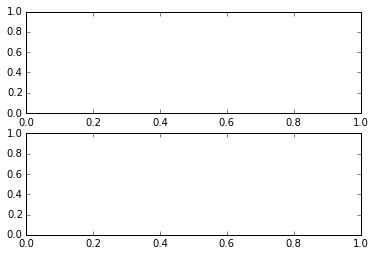

In [14]:
ax1 = plt.subplot2grid(shape=(2,1), loc=(0,0))
ax2 = plt.subplot2grid(shape=(2,1), loc=(1,0))

vkhsw[['norm_ret', 'ret']].plot(ax = ax1)
vkhsw[[ 'long_ma', 'short_ma']].plot(ax = ax2)
trans_count = vkhsw[vkhsw.sig > vkhsw.shift().sig]

In [15]:
def gen_param_df(val_name, val):
    return pd.DataFrame({'key':np.ones(len(val)), val_name:val} )

def gen_params_matrix():
    sspan = range(10, 40, 5)
    ds = gen_param_df('sspan', sspan)

    lf = range(3, 6)
    dlf = gen_param_df('lf', lf)
    #len(range(10, 40, 5))


    stoploss = [0.96, 0.95, 0.94]

    dsl =gen_param_df('stopl', stoploss)

    trail_factor = range(0, 4)
    dtf = gen_param_df('trailf', trail_factor)
    temp1 = pd.merge(ds, dlf, on =['key'])
    temp2 = pd.merge( dsl,dtf, on=['key'])
    return pd.merge(temp1, temp2, on = ['key'])

temp = gen_params_matrix()
temp.lf = temp.lf * temp.sspan


In [16]:
temp.drop('key', axis = 1, inPlace =True) 
len(data)

2206

In [19]:
for i in range(0, len(temp)):
    params = temp.iloc[i]
    print('sspan {0:f} lf {1:3f} stopl {2:2f} trailf {3:1f} '.format(params.sspan, params.lf, params.stopl, params.trailf))
    do_back_test(data, params.sspan, params.lf, params.stopl, params.trailf)
    

sspan 10.000000 lf 30.000000 stopl 0.960000 trailf 0.000000 
trans count 97, loss count 17, win count 75
Max drowndown 0.0822942643392 Max Return  1.33927278653 Mean Return 1.04825737179
sspan 10.000000 lf 30.000000 stopl 0.960000 trailf 1.000000 
trans count 97, loss count 17, win count 75
Max drowndown 0.0822942643392 Max Return  1.33927278653 Mean Return 1.04825737179
sspan 10.000000 lf 30.000000 stopl 0.960000 trailf 2.000000 
trans count 97, loss count 17, win count 75
Max drowndown 0.0822942643392 Max Return  1.33927278653 Mean Return 1.04825737179
sspan 10.000000 lf 30.000000 stopl 0.960000 trailf 3.000000 
trans count 97, loss count 17, win count 75
Max drowndown 0.0822942643392 Max Return  1.33927278653 Mean Return 1.04825737179
sspan 10.000000 lf 30.000000 stopl 0.950000 trailf 0.000000 
trans count 97, loss count 17, win count 75
Max drowndown 0.0822942643392 Max Return  1.33927278653 Mean Return 1.04825737179
sspan 10.000000 lf 30.000000 stopl 0.950000 trailf 1.000000 
tran

In [153]:
max_return = pd.Series([0.0]*len(trans_count))
max_drawdown = max_return.copy()
exit_return = max_drawdown.copy()
max_return

0    0
1    0
2    0
3    0
4    0
5    0
6    0
dtype: float64

In [154]:
for i in range(0, len(trans_idx)//2):
    idx = i *2
    trading_days = vkhsw[trans_idx[idx]:trans_idx[idx+1] ].copy()
    day_len = len(trading_days)
    trading_days.ret = (1+trading_days["Adj Close"].pct_change()).cumprod()
    trading_days.norm_ret = trading_days.ret /trading_days.ret.cummax()#use to calc rolling max
    max_return[i], max_drawdown[i], exit_return[i] = trade_summ(trading_days, trans_idx[idx+1])

In [155]:
trade_summary = pd.DataFrame([max_return, max_drawdown, exit_return])
trade_summary

      0     1     2  ...      4     5     6
0  1.27  0.98  1.14  ...   1.49  1.23  2.28
1  0.29  0.07  0.16  ...   0.23  0.20  0.53
2  0.91  0.91  1.02  ...   1.31  1.05  1.17

[3 rows x 7 columns]

In [29]:
last_return = exit_return.cumprod()

In [80]:

def trade_summ( data, at):
    max_ret = np.max(data.ret)
    max_dd = 1 - np.min(data.norm_ret)
    exit_ret = data.ret.loc[at]
    return (max_ret, max_dd, exit_ret)

In [21]:
pass


In [22]:
pass

In [23]:
pass

In [24]:
pass

In [166]:
test

             Open   High    Low    ...     sig   ret  norm_ret
Date                               ...                        
2011-12-06  12.30  12.45  12.16    ...       0  0.92      0.87
2011-12-07  12.42  12.75  12.35    ...       1  0.94      0.89
2011-12-08  12.51  12.66  12.16    ...       1  0.92      0.87
2011-12-09  12.18  12.42  12.16    ...       1  0.91      0.86
2011-12-12  12.23  12.39  12.20    ...       1  0.91      0.86
...           ...    ...    ...    ...     ...   ...       ...
2011-12-14  11.90  12.05  11.77    ...       1  0.88      0.83
2011-12-15  11.73  11.88  11.11    ...       1  0.88      0.81
2011-12-16  11.44  11.68  11.15    ...       0  0.88      0.82
2011-12-19  11.48  11.62  11.19    ...       1  0.88      0.81
2011-12-20  11.58  11.88  11.50    ...       0  0.88      0.82

[11 rows x 15 columns]

13.764610827441029